# Vibração Excitada Harmonicamente

Professor Paulo Victor

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

## Excitação Harmônica com Amplitude Constante

![](figuras/fig3-1.png)

$F(t) = F_0 sen (\omega t)$

Equação de movimento: 

$m \ddot{x} + c \dot{x} + k x = F_0 sen (\omega t)$



In [1]:
from sympy import *

In [2]:
m,c,k = symbols('m c k', positive = True)
t = symbols('t')
x = Function('x')(t)
Fo,omega = symbols('F0 omega',positive = True)
A,B = symbols('A B')
xF = Function('x_F')(t)

In [3]:
EDM = Eq(m*x.diff(t,2) + c*x.diff(t) + k*x,Fo*sin(omega*t))
EDM

Eq(c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)), F0*sin(omega*t))

Solução:

$x(t) = x_L(t) + x_F(t)$

Onde:

$x_L(t)$ é a solução homogênea

$x_F(t)$ é a solução particular

para $\zeta < 1$: 

$x_L(t) = X_1 e^{-\zeta \omega_n t} sen (\sqrt{1 - \zeta^2} \omega_n t + \phi_1)$


Considerando o modelo de excitação por força harmônica: 

Vamos supor que a resposta forçada seja uma oscilação harmônica com a mesma frequência da força excitadora.

$x_F(t) = A sen (\omega t) + B cos (\omega t)$


In [4]:
Eq1 = Eq(xF,A*sin(omega*t) + B*cos(omega*t))
Eq1

Eq(x_F(t), A*sin(omega*t) + B*cos(omega*t))

Substituindo essa resposta na equação de movimento:

In [5]:
Eq2 = Eq(m*xF.diff(t,2),(m*Eq1.rhs.diff(t,2)).expand())
Eq2

Eq(m*Derivative(x_F(t), (t, 2)), -A*m*omega**2*sin(omega*t) - B*m*omega**2*cos(omega*t))

In [6]:
Eq3 = Eq(c*xF.diff(t),(c*Eq1.rhs.diff(t)).expand())
Eq3

Eq(c*Derivative(x_F(t), t), A*c*omega*cos(omega*t) - B*c*omega*sin(omega*t))

In [7]:
Eq4 = Eq(k*xF,(k*Eq1.rhs).expand())
Eq4

Eq(k*x_F(t), A*k*sin(omega*t) + B*k*cos(omega*t))

In [8]:
Eq5 = Eq(Eq2.rhs + Eq3.rhs + Eq4.rhs ,Fo*sin (omega*t))
Eq5

Eq(A*c*omega*cos(omega*t) + A*k*sin(omega*t) - A*m*omega**2*sin(omega*t) - B*c*omega*sin(omega*t) + B*k*cos(omega*t) - B*m*omega**2*cos(omega*t), F0*sin(omega*t))

Separando os cossenos dos senos:

In [9]:
Eq6 = Eq(Eq5.lhs.subs(cos(omega*t),0),Fo*sin(omega*t))
Eq6

Eq(A*k*sin(omega*t) - A*m*omega**2*sin(omega*t) - B*c*omega*sin(omega*t), F0*sin(omega*t))

In [10]:
Eq7 = Eq(Eq5.lhs.subs(sin(omega*t),0),0)
Eq7

Eq(A*c*omega*cos(omega*t) + B*k*cos(omega*t) - B*m*omega**2*cos(omega*t), 0)

In [11]:
sol_A_B = solve([Eq6,Eq7],A,B)
sol_A_B

{A: F0*k/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) - F0*m*omega**2/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4),
 B: -F0*c*omega/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4)}

In [12]:
A_sol = Eq(A,sol_A_B[A]).simplify()
A_sol

Eq(A, F0*(k - m*omega**2)/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4))

In [13]:
B_sol = Eq(B,sol_A_B[B]).simplify()
B_sol

Eq(B, -F0*c*omega/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4))

Substituindo as soluções de $A$ e $B$ em $x_F(t) = A sen (\omega t) + B sen (\omega t)$:

In [14]:
Eq8 = Eq(xF,(Eq1.rhs).subs({A:A_sol.rhs,B:B_sol.rhs}))
Eq8

Eq(x_F(t), -F0*c*omega*cos(omega*t)/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) + F0*(k - m*omega**2)*sin(omega*t)/(c**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4))

Para representar de forma mais compacta, podemos usar:

$tg \phi = \dfrac{c \omega}{k - m \omega^2}$

$X_F = \dfrac{F_0}{\sqrt{(k-m\omega^2)^2 + (c \omega)^2}}$

Deste modo a resposta forçada pode ser escrita como: 

$x_F(t) = X_F sen(\omega t - \phi)$

A resposta forçada é portanto, um deslocamento harmônico com a mesma frequência $\omega[rad/s]$ e atraso de fase $\phi[rad]$ em relação à força excitadora.

$$x(t) = X_1 e^{-\zeta \omega_n t}sen \left( \sqrt{1 - \zeta^2} \omega_n t + \phi_1 \right) + X_F sen (\omega t - \phi)$$

Em python, a resposta do sistema pode ser obtida usando: 

```
x0,v0 = symbols('x_0 v_0') # condições iniciais
sol = dsolve(EDM,ics={x.subs(t,0):x0,x.diff(t).subs(t,0):v0})
```

In [15]:
x0,v0 = symbols('x_0 v_0') # condições iniciais
sol = dsolve(EDM,ics={x.subs(t,0):x0,x.diff(t).subs(t,0):v0})

In [16]:
dic = {m:1,c:20*0.05,k:100,Fo:5,omega:5,x0:0.5,v0:0}

In [17]:
x_t = sol.rhs.subs(dic)

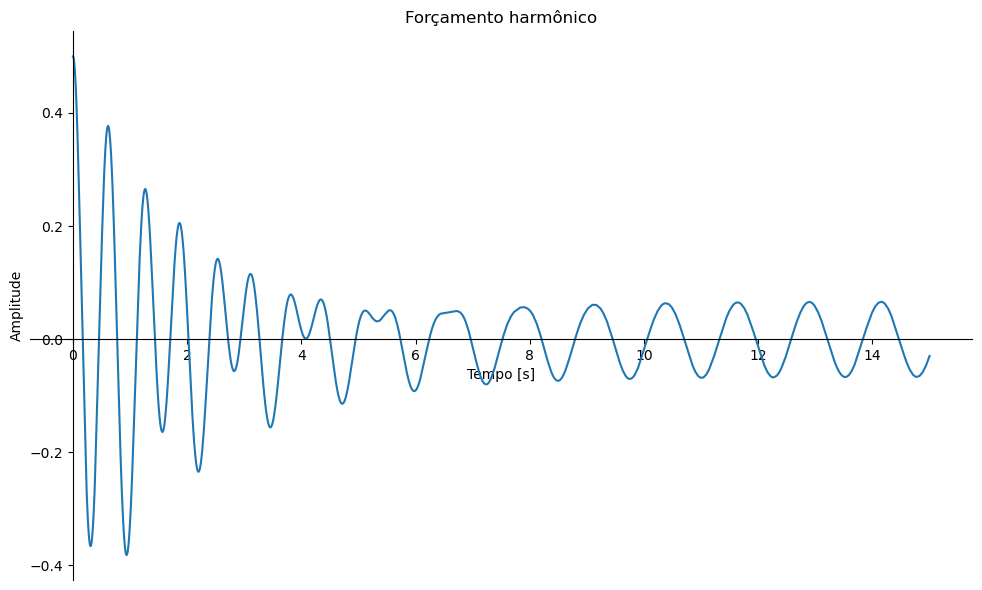

In [18]:
plt = plot(x_t,(t,0,15),show=False)
plt.size = (10,6)
plt.title = 'Forçamento harmônico'
plt.xlabel = 'Tempo [s]'
plt.ylabel = 'Amplitude'
plt.show()

A amplitude forçada $X_F$ e o ângulo de fase $\phi$ podem ser apresentados em termos de parâmetros adimensionais, resultando assim expressões válidas independentemente do sistema de unidades usado para expressar os parâmetros físicos do sistema.

$$\dfrac{X_F}{\left(\dfrac{F_0}{k}\right)} = \dfrac{1}{\sqrt{\left[1-\left(\dfrac{\omega}{\omega_n}\right)^2 \right]^2 + \left(2 \zeta \dfrac{\omega}{\omega_n} \right)^2}}$$

$$tg \phi = \dfrac{2 \zeta \left( \dfrac{\omega}{\omega_n} \right)}{1 - \left( \dfrac{\omega}{\omega_n} \right)^2}$$

$\dfrac{F_0}{k}$ é a deflexão que ocorreria se a força $F_0$ atuasse estaticamente. 

A relação entre a amplitude da resposta forçada $X_F$ e a deflexão estática $\left( \dfrac{F_0}{k} \right)$ é denominada **Fator de Ampliação**. 

$$|H(\omega)| = \dfrac{X_F}{\left( \dfrac{F_0}{k} \right)}$$

In [19]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def Hw(zeta):
    rw = np.linspace(0,5,500)
    H = 1/(np.sqrt((1-(rw)**2)**2 + (2*zeta*rw)**2))
    plt.plot(rw,H)
    plt.ylim(0,10)
    plt.grid(True)
    plt.xlabel(r'$\dfrac{\omega}{\omega_n}$')
    plt.ylabel(r'$|H(\omega)|$')
    uns = np.linspace(1,1,500)
    plt.plot(rw,uns)

In [21]:
interact(Hw,zeta=(0.0,1.2,0.01))

interactive(children=(FloatSlider(value=0.6, description='zeta', max=1.2, step=0.01), Output()), _dom_classes=…

<function __main__.Hw(zeta)>

In [22]:
def Psi(zeta):
    rw = np.linspace(0,5,500)
    psi = np.arctan(2*zeta*rw/(1-rw**2))
    plt.plot(rw,psi)
    plt.ylim(-np.pi/2,np.pi/2)
    plt.grid(True)
    plt.xlabel(r'$\dfrac{\omega}{\omega_n}$')
    plt.ylabel(r'$\phi$')

In [23]:
interact(Psi,zeta=(0.05,1.2,0.01))

interactive(children=(FloatSlider(value=0.6200000000000001, description='zeta', max=1.2, min=0.05, step=0.01),…

<function __main__.Psi(zeta)>

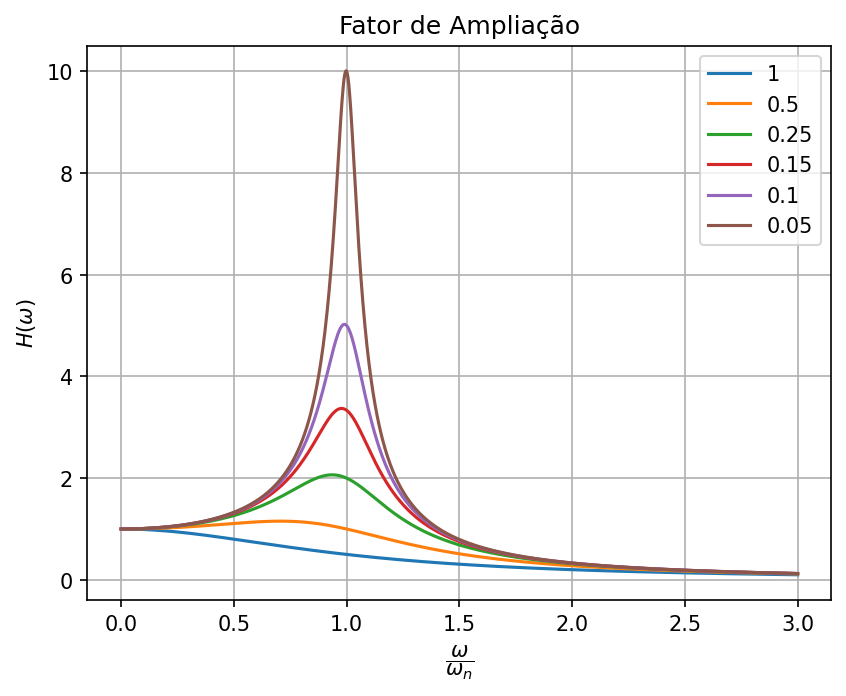

In [24]:
Zeta=[1, 0.5, 0.25, 0.15, 0.1, 0.05]
rw=np.linspace(0,3,1000) # w/wn
def H(zeta):
    return 1/(np.sqrt((1 - (rw)**2)**2 + (2*zeta*rw)**2))
plt.figure(dpi=150)
for i in range (0,len(Zeta)):
    Hi=H(Zeta[i])
    plt.plot(rw,Hi)
plt.title('Fator de Ampliação')
plt.ylabel(r'$H(\omega)$')
plt.xlabel(r'$\dfrac{\omega}{\omega_n}$')
plt.grid(True)
plt.legend([str(Zeta[0]),str(Zeta[1]),str(Zeta[2]),str(Zeta[3]),str(Zeta[4]),str(Zeta[5])])
plt.show()

$ \rightarrow$ A amplitude da resposta vai depender não apenas da amplitude da força, mas também da frequência com a qual ela é aplicada e do fator de amortecimento do sistema.

$ \rightarrow$ Para sistemas fracamente amortecidos ($\zeta <<1$), quando a frequência da força excitadora coincide com a frequência natural do sistema $\dfrac{\omega}{\omega_n} = 1$ ocorrem valores elevados da resposta : **ressonância:** $|H(\omega) >>1$.

$ \rightarrow$ De um modo geral, para quaisquer valores de $ \zeta$, a frequência adimensional na qual ocorre a amplitude máxima da resposta é determinada quando: 

$\dfrac{d}{d \left(\dfrac{\omega}{\omega_n}\right)} |H(\omega)| = 0$

A frequência na qual ocorre o máximo é:

$\left(\dfrac{\omega}{\omega_n}\right)_{|H|_{max}} = \sqrt{1 - 2 \zeta^2}$

$|H(\omega)|_{max} = \dfrac{1}{2 \zeta \sqrt{1 - \zeta^2}}$

A amplitude de resposta quando $\dfrac{\omega}{\omega_n} =1 $ é:

$|H(\omega)| = \dfrac{1}{2\zeta}$

A  figura a seguir é uma representação da amplitude da resposta em frequência em termos da velocidade $\dot{x}$ em função da frequência adimensional $\left(\dfrac{\omega}{\omega_n}\right)$

![](figuras/fig3-2.png)

$\rightarrow$ Observamos que o valor máximo da amplitude da resposta em velocidade ocorre quando $\left(\dfrac{\omega}{\omega_n} \right) = 1$, independentemente do fator de amortecimento do sistema.

$\rightarrow$ Considerando que, segundo várias normas internacionais, a severidade de vibração está associada à energia cinética do movimento vibratório $\rightarrow$ por isso é lógico caracterizar a ressonância como a situação na qual a frequência da força excitadora coincide com a frequência não amortecida do sistema.

$\left(\dfrac{\omega}{\omega_n}\right) = 1$